In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

C:\Users\felip\AppData\Roaming\Python\Python310\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('data.csv')

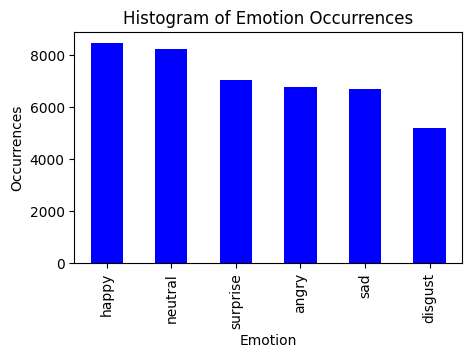

In [3]:
plt.figure(figsize=(5, 3))
emotion_counts = data["label"].value_counts()
emotion_counts.plot(kind='bar', color='blue')
plt.title('Histogram of Emotion Occurrences')
plt.xlabel('Emotion')
plt.ylabel('Occurrences')
plt.show()

In [4]:
y = data["label"]
X = data.drop(["label"], axis=1)

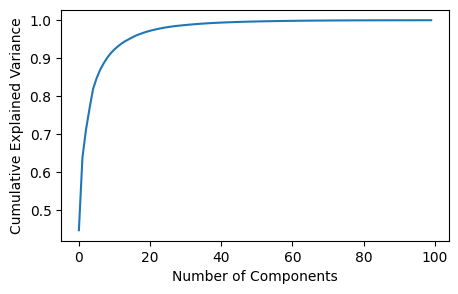

Top Cumulative Explained Variance:  0.999830439840397


In [5]:
n_components = 100
pca = decomposition.PCA(n_components=n_components)
pca.fit(X.values)

plt.figure(figsize=(5, 3))
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_sum)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

print("Top Cumulative Explained Variance: ", cumulative_sum[n_components-1])

In [6]:
original_feature_names = list(X.columns)

for component_num, component in enumerate(pca.components_):
    sorted_features_indices = component.argsort()[::-1]
    top_feature_names = [original_feature_names[idx] for idx in sorted_features_indices]
    print(f"Top features for Principal Component {component_num + 1}:")
    print("Positive-contributing features:")
    for feature_name in top_feature_names[:10]:
        print(f"- {feature_name}")
    print("Negative-contributing features:")
    for feature_name in top_feature_names[-10:][::-1]:
        print(f"- {feature_name}")
    print()

Top features for Principal Component 1:
Positive-contributing features:
- 408
- 506
- 179
- 286
- 375
- 441
- 214
- 145
- 413
- 303
Negative-contributing features:
- 19
- 20
- 3
- 17
- 18
- 4
- 146
- 193
- 5
- 422

Top features for Principal Component 2:
Positive-contributing features:
- 214
- 179
- 73
- 441
- 408
- 303
- 106
- 286
- 336
- 191
Negative-contributing features:
- 69
- 366
- 68
- 136
- 204
- 367
- 137
- 67
- 227
- 70

Top features for Principal Component 3:
Positive-contributing features:
- 45
- 44
- 19
- 49
- 20
- 48
- 1
- 2
- 35
- 9
Negative-contributing features:
- 4
- 3
- 5
- 38
- 25
- 22
- 132
- 94
- 126
- 133

Top features for Principal Component 4:
Positive-contributing features:
- 35
- 34
- 4
- 45
- 3
- 44
- 5
- 49
- 48
- 25
Negative-contributing features:
- 2
- 20
- 1
- 19
- 449
- 417
- 340
- 431
- 419
- 416

Top features for Principal Component 5:
Positive-contributing features:
- 16
- 13
- 110
- 224
- 188
- 267
- 184
- 190
- 229
- 265
Negative-contributing featu

In [7]:
principal_components = pca.transform(X)

C:\Users\felip\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [8]:
pc_df = pd.DataFrame(data=principal_components, columns=[f"PC{i+1}" for i in range(n_components)])

In [9]:
pc_df["target"] = y.to_list()

In [10]:
pc_df.to_csv("principal_components_with_labels.csv", index=False)

In [11]:
import joblib

joblib.dump(pca, 'pca_model.pkl')

['pca_model.pkl']